In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import koreanize_matplotlib

In [2]:
from preamble import *

In [3]:
import os

### 원핫인코딩- get_dummies()

In [5]:
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
                   header=None, index_col=False, names= ['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택함
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [8]:
print(data.gender.value_counts())
#값에 따른 필드 만들기 위하여 value_counts()

gender
Male      21790
Female    10771
Name: count, dtype: int64


In [9]:
#원본 특성
list(data.columns)

['age',
 'workclass',
 'education',
 'gender',
 'hours-per-week',
 'occupation',
 'income']

In [10]:
#get_dummies() - 문자열 같은 객체 타입, 카테고리들을 자동으로 변환해줌. 뽑아내 주는거
data_dummies=pd.get_dummies(data)
list(data_dummies.columns)

['age',
 'hours-per-week',
 'workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'gender_ Female',
 'gender_ Male',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',


In [11]:
data_dummies.head()
#칼럼의 값별로 true false 값으로 변환되었는지 즉 원핫인코딩 되었는지 헤드로 확인해봄

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,...,False,False,True,False
1,50,13,False,False,...,False,False,True,False
2,38,40,False,False,...,False,False,True,False
3,53,40,False,False,...,False,False,True,False
4,28,40,False,False,...,False,False,True,False


In [12]:
features=data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# ***지금 데이터프레임 상태인걸 numpy 배열로 변환해야함.
# .values 속성을 사용하여 데프 -> NumPy 형태의 [39, 40, False, ..., False, False, False] 로 변환 가능함
X = features.values
y = data_dummies['income_ >50K'].values

In [13]:
print(X.shape, y.shape)
#내가 아는 형태의 NumPy 형태의 X, Y 추출되었으므로 원하는 모델 써서 훈련하면 됨.

(32561, 44) (32561,)


### 숫자로 표현된 범주 변환

In [15]:
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                          '범주형 특성': ['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [16]:
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,False,True,False
1,1,False,False,True
2,2,False,True,False
3,1,True,False,False


In [19]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
#원래 숫자특성 안의 데이터값인 01,2,1,... 이거를 숫자로 인식하니까 인코딩이 안된거라서
#astype(str)를 통해서 문자열로 변환시켜 버림 *** 

pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])
#columns=에 숫자 특성 열도 명시해 주어야 get_dummies 가 둘다 범주형으로 인식하고 원핫인코딩 해줌

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,True,False,False,False,True,False
1,False,True,False,False,False,True
2,False,False,True,False,True,False
3,False,True,False,True,False,False


### OneHotEncoder 클래스로 변환

In [20]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse_output=False) #false를 통해서 NumPy 배열을 반환하도록 함
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [22]:
#원래 이름을 알려다오
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


### ColumnTransformer - 그룹 지정해서 내맘대로 변환

In [25]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer( 
     [("scaling", StandardScaler(), ['age', 'hours-per-week']),
      #첫번째 변환기 "scaling", 스텐다드스케일러 적용할거고, [] 이 열들에 적용해
     ("onehot", OneHotEncoder(sparse_output=False),['workclass', 'education', 'gender', 'occupation'])])
      #원핫인코딩 할거고, 넘파이로 반환해.
      

In [29]:
ct

#데이터 전처리 객체로서 봐야됨. 내가 원하는 방식의 인코딩을 입력해놓은 전처리 객체

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('onehot', OneHotEncoder(sparse_output=False),
                                 ['workclass', 'education', 'gender',
                                  'occupation'])])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열 추출.
data_features = data.drop("income", axis=1)
# 데이터프레임과 incom을 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

X_train_trans=ct.fit_transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [27]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

#train은 fit과 transform모두에 쓰고, test는 fit 아니고 transform만.
X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


In [31]:
from sklearn.compose import make_column_transformer

#뭐할거야~ 단계 이름 지정 없이 해주는 함수
ct = make_column_transformer(
     (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse_output=False), ['workclass', 'education', 'gender', 'occupation']))

### 구간분할, 이산화, 리니어, 트리

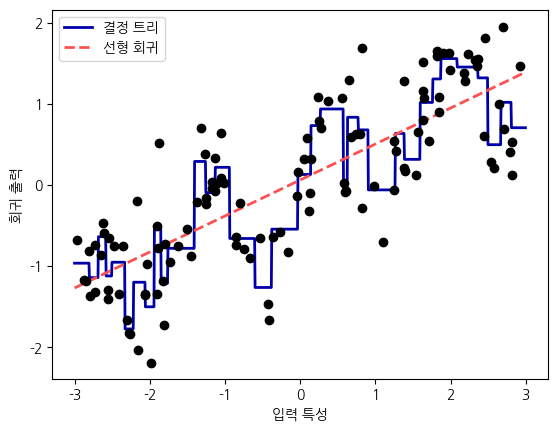

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import mglearn.datasets

X, y = mglearn.datasets.make_wave(n_samples=120)

# 예측할 새로운 데이터 *line* 범위를 지정하는것만으로 새로운 데이터 지정임을 생각하기 
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) #-1일때는 행은모르겠고 1열로정리해

#각각의 두 모델이 line에 대해 예측을 수행하는 과정

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
#리프 노드에 최소샘플 3개.
plt.plot(line, reg.predict(line), label="결정 트리")
#plt.plot(X축에는 line 저거를, y축은 저 예측값을.)

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")
# 또 이번엔 이 선형회귀로 예측값을 그려보시오. 

plt.plot(X[:,0], y, 'o', c='k')
#원본데이터까만점 보여주기위해
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

### KBinsDiscretizer

> 연속형 데이터를 구간으로 나누어 범주화 하기

> 결정트리, 랜덤포레스트 처리

> 비선형 : 나이와 소득 처럼, 연속형데이터와 종속변인 사이 비선형결과일때. 완전 선형이 아닐때 
각 구간에서 관계 분석.

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
#10개 구간을, 각 구간 크기를 동일하게 나누어 다오 
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)
kb

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
         1.744,  2.333,  2.921])                                       ]


KBinsDiscretizer(n_bins=10, strategy='uniform')

In [38]:
#kb도 모델객체야 구간으로 잘라놓고 거기에 속하는지 아닌지를 나타내는 값으로 반환해줄거임 
x_binned=kb.transform(X)
x_binned
#변환값 뱉는 아이

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [39]:
print(X[:10])
x_binned.toarray()[:10]
# 각 샘플이 어떤 구간에 속하는지를 뱉어줌

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [41]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
#encode='onehot-dense'를 사용하면, KBinsDiscretizer가 구간으로 나눈 결과를 밀집array로 반환
kb.fit(X)
X_binned = kb.transform(X)

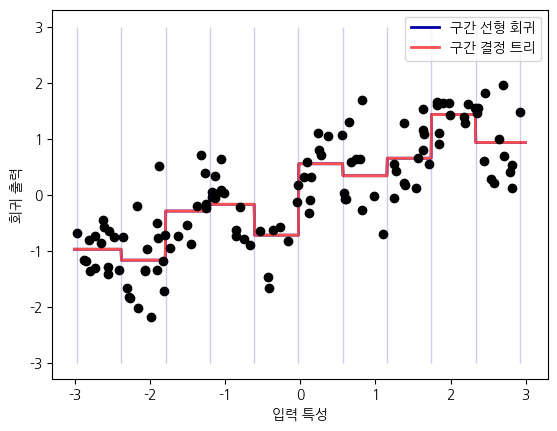

In [42]:
#다시그려보자 내가 인코딩 잘했으니까, 범주화해서 인코딩한거로 예측했을때 어떤지 보자구 

line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.show() # 책에는 없음